# AIDM7380 Recommender Systems for Digital Media

## Group Name: MindReader
## Student Name and Student ID:
*  BAI Kunjing 24448710
*  LIU Kexin 24420522
*  ZHANG Huyi 24474940



In [162]:
# Install libraries using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Importing our group dataset


In [163]:
import pandas as pd
import numpy as np

In [164]:
from google.colab import drive
drivePath = '/content/drive'
drive.mount(drivePath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
# Install the library on your environment
!pip install wget

In [166]:
# Import the library
import wget
import os, pathlib
import pandas as pd

# Setup URL and path variables
baseURL = 'https://baikunjing515.github.io/AIDM7380_MindReader_GroupProject/'
doc = 'elearning_dataset1.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

#Create path if not exists
if not(os.path.exists(dataPath)):
  path = pathlib.Path(dataPath)
  path.mkdir(parents=True, exist_ok=True)
else:
  print('The data path you selected already exists')

# Download the file
fileName = wget.download(fullURL, out=dataPath)

# Print the file name including the local path
print(fileName)

The data path you selected already exists
/content/drive/MyDrive/Colab Notebooks/data/elearning_dataset1 (1).csv


In [167]:
evidence = pd.read_csv(fileName)

In [168]:
# Checkin the type and take a glance at the head
print(type(evidence))
evidence.head(5)

<class 'pandas.core.frame.DataFrame'>


,Date,UserID,CourseID,Event
0,2022-01-10 10:12:35,440,247,view_course
1,2022-01-10 10:22:28,1186,338,view_course
2,2022-01-10 10:23:13,1186,338,detailed_description
3,2022-01-10 10:42:18,703,238,view_course
4,2022-01-10 10:51:02,225,350,view_course


# Part 1

# Data Exploration & Data Overview

In [169]:
# The number of cases/observations, the number of variables
evidence.shape

(17365, 4)

In [170]:
# Check the column
evidence.columns

Index(['Date', 'UserID', 'CourseID', 'Event'], dtype='object')

In [171]:
# Check the index
evidence.index

RangeIndex(start=0, stop=17365, step=1)

In [172]:
# Check column names, data types, and non-null counts
evidence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17365 entries, 0 to 17364
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      17365 non-null  object
 1   UserID    17365 non-null  int64 
 2   CourseID  17365 non-null  int64 
 3   Event     17365 non-null  object
dtypes: int64(2), object(2)
memory usage: 542.8+ KB


In [173]:
# Generate descriptive statistics for numerical columns
evidence.describe()

,UserID,CourseID
count,17365.000000,17365.000000
mean,799.491045,198.949611
std,467.744303,115.184790
min,0.000000,0.000000
25%,391.000000,101.000000
50%,802.000000,197.000000
75%,1205.000000,295.000000
max,1599.000000,399.000000


In [174]:
# Change date to datetime
evidence['Date'] = pd.to_datetime(evidence['Date'])
evidence['DateTime'] = evidence['Date']
evidence['Hour'] = evidence['Date'].dt.hour
evidence['DayOfWeek'] = evidence['Date'].dt.day_name()
evidence['Month'] = evidence['Date'].dt.month
print("DateTime dtype:", evidence['DateTime'].dtype)
print("First record datetime:", evidence['DateTime'].iloc[0])

DateTime dtype: datetime64[ns]
First record datetime: 2022-01-10 10:12:35


In [175]:
# Count missing values per column
evidence.isnull().sum()

,0
Date,0
UserID,0
CourseID,0
Event,0
DateTime,0
Hour,0
DayOfWeek,0
Month,0


In [176]:
# Check for duplicate rows
num_duplicates = evidence.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [177]:
# Number of Users / Courses / Event
num_users = evidence['UserID'].nunique()
num_courses = evidence['CourseID'].nunique()
num_events = evidence['Event'].nunique()
event_types = evidence['Event'].unique()
print(f" Dataset Overview:")
print(f" Total Users   : {num_users}")
print(f" Total Courses : {num_courses}")
print(f" Event Types   : {num_events} ({', '.join(event_types)})")

 Dataset Overview:
 Total Users   : 1591
 Total Courses : 396
 Event Types   : 5 (view_course, detailed_description, teacher_profile, rundown, institution)


In [178]:
# Check the event values
print(evidence['Event'].value_counts())

Event
view_course             8874
rundown                 2677
detailed_description    2229
teacher_profile         1816
institution             1769
Name: count, dtype: int64


In [179]:
# Check the users' activity
user_activity = evidence.groupby('UserID').size()
print(user_activity.describe())

count    1591.000000
mean       10.914519
std         4.883187
min         1.000000
25%         7.000000
50%        11.000000
75%        14.000000
max        35.000000
dtype: float64


# Data Visualization

## User-Centric Analysis

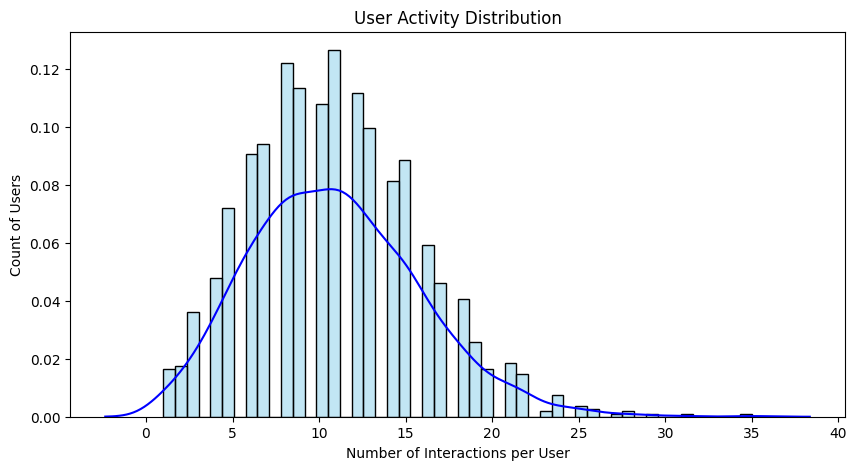

In [180]:
# User Interaction Distribution
user_activity = evidence['UserID'].value_counts()
# Illustrate the chart

plt.figure(figsize=(10,5))
sns.histplot(user_activity, bins=50, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(user_activity, color='blue')
plt.xlabel('Number of Interactions per User')
plt.ylabel('Count of Users')
plt.title('User Activity Distribution')
plt.show()

**User Interaction Distribution:**
*   The majority of users are concentrated in the moderately active range of 5-15 interactions (with a density greater than 0.12), followed by a rapid decline. Highly active users with over 20 interactions are extremely rare, while there is also a small number of rare interaction users (with densities concentrated between 0.02-0.04). This distribution reveals a significant imbalance in user engagement on the platform.



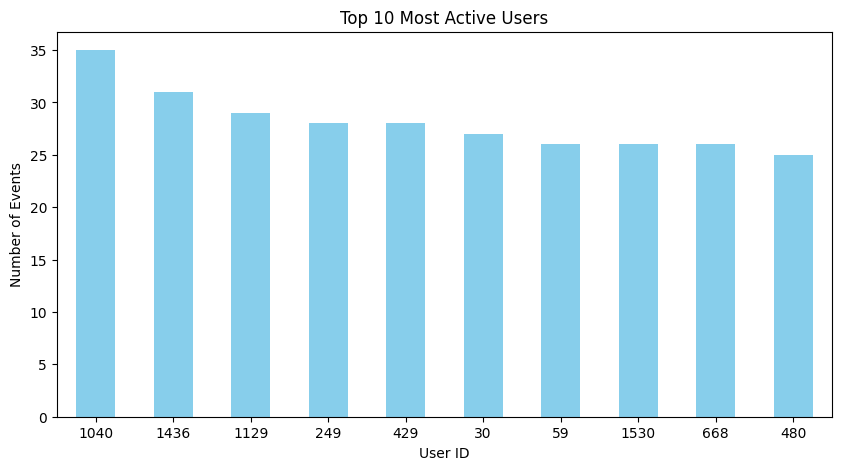

In [181]:
# Top10 Most Active Users
top_users = evidence['UserID'].value_counts().head(10)

# Illustrate the chart
plt.figure(figsize=(10, 5))
top_users.plot(kind='bar',color='skyblue')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Events')
plt.xticks(rotation=0)
plt.show()

**Top 10 Most Active Users:**
*   User ID: 1040,1436,1129,249,429,30,59,1530,668,480



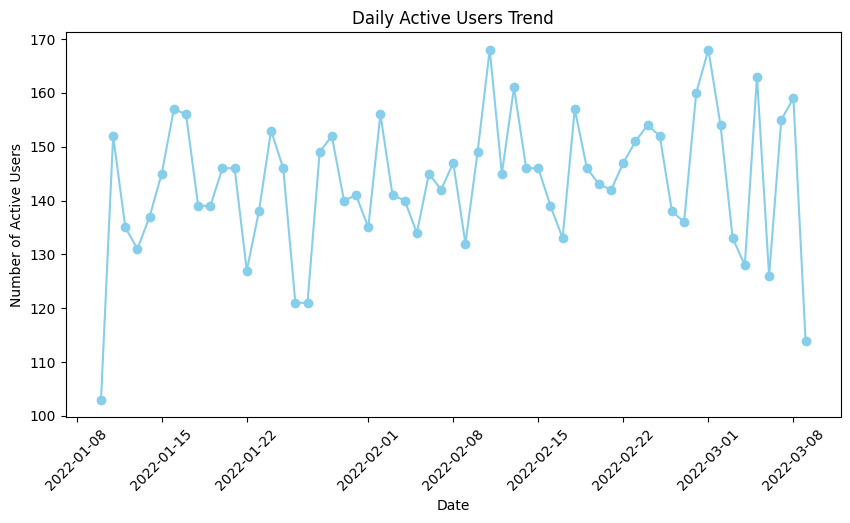

In [182]:
# Daily Active Users
daily_activity = evidence.groupby(evidence['DateTime'].dt.date)['UserID'].nunique()

# Illustrate the chart
daily_activity.plot(figsize=(10,5), marker='o',color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Active Users')
plt.title('Daily Active Users Trend')
plt.xticks(rotation=45)
plt.show()

**Daily Active Users Trend:**
*   The line chart illustrates the trend of daily active users from 2022-01-10, to 2022-03-09. It can be observed that the number of active users fluctuated within this period, generally ranging between 120 and 160. The fluctuations were relatively significant and dramatic in early January and early March, while in February, the number of active users was higher and more stable.

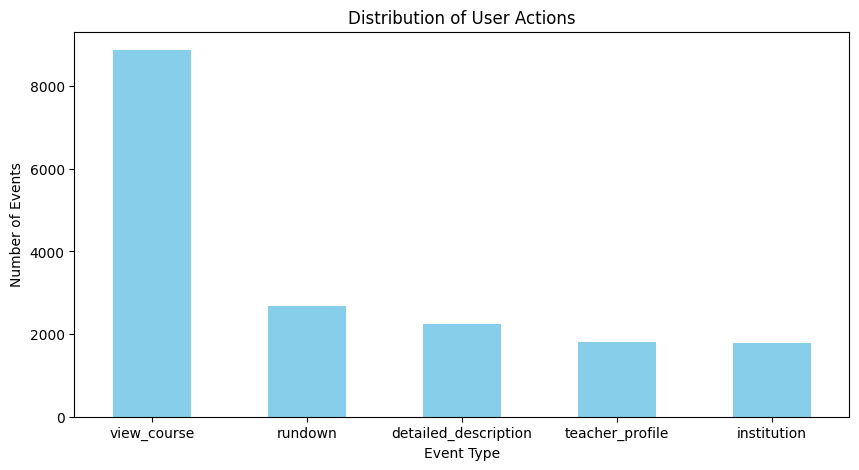

In [183]:
# Distribution of User Actions
event_counts = evidence['Event'].value_counts()

# Illustrate the chart
plt.figure(figsize=(10, 5))
event_counts.plot(kind='bar', stacked=True, color='skyblue')
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.title("Distribution of User Actions")
plt.xticks(rotation=0)
plt.show()

**Distribution of User Actions:**

*   Users are most concerned about 'view_course', followed by 'rundown' and 'detailed_description'.The level of attention paid to 'teacher_profile'and institution is significantly lower.

## Course-Centric Analysis

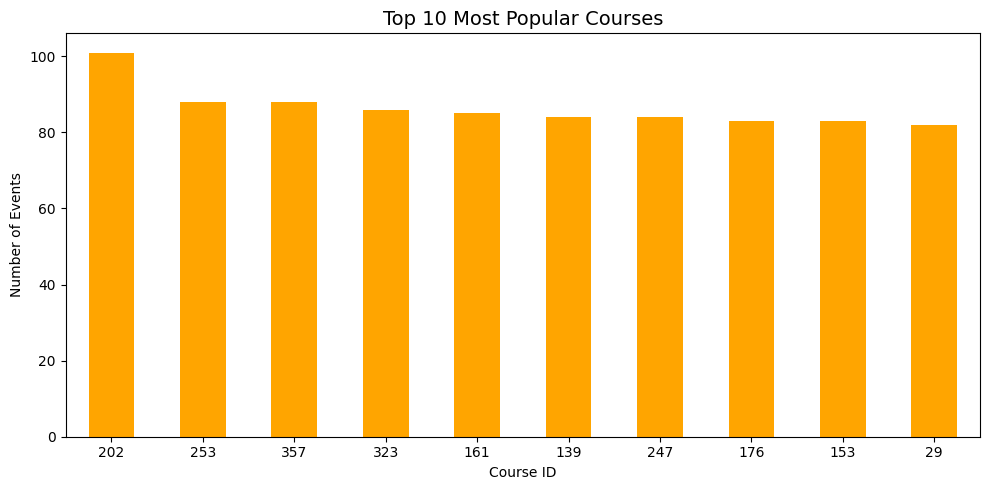

In [184]:
# Top 10 Most Popular Courses （Based on the entire interaction)
course_popularity = evidence['CourseID'].value_counts().head(10)

# Illustrate the chart
plt.figure(figsize=(10, 5))
course_popularity.plot(kind='bar', color='orange')
plt.xlabel("Course ID")
plt.ylabel("Number of Events")
plt.title("Top 10 Most Popular Courses", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Top 10 Most Popular Courses(Based on the entire interaction)**


*   202,253,357,323,161,139,247,176,153,29



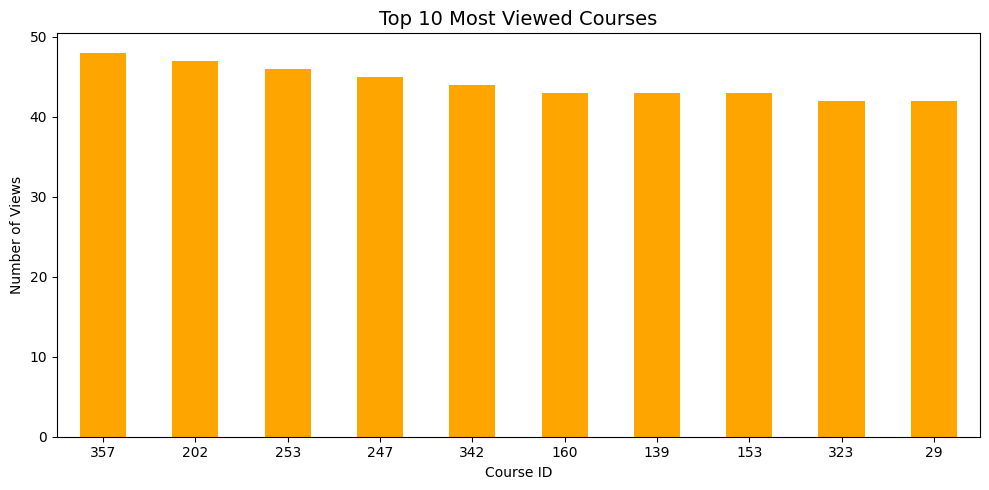

In [185]:
# Top 10 Most Popular Courses （Based on the view_course)
view_course_events = evidence[evidence['Event'] == 'view_course']
viewcourse_popularity = view_course_events['CourseID'].value_counts().head(10)

# Illustrate the chart
plt.figure(figsize=(10, 5))
viewcourse_popularity.plot(kind='bar', color='orange')
plt.xlabel("Course ID")
plt.ylabel("Number of Views")
plt.title("Top 10 Most Viewed Courses", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Top 10 Most Popular Courses(Based on the view_course)**


*   357,202,253,247,342,160,139,153,323,29


<Figure size 1000x500 with 0 Axes>

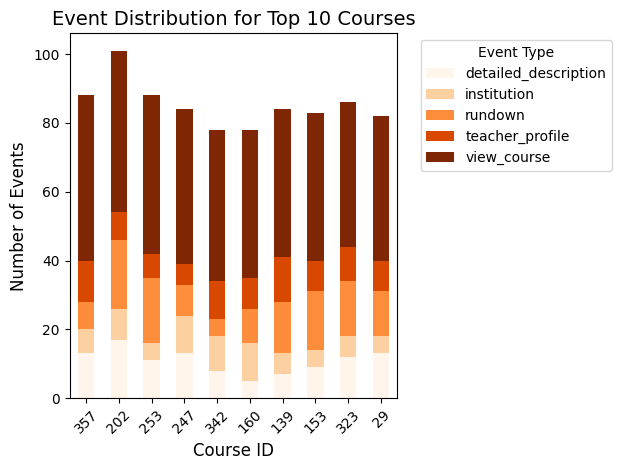

In [186]:
# Event Distribution for Top 10 Courses
view_course_events = evidence[evidence['Event'] == 'view_course']
course_popularity = view_course_events['CourseID'].value_counts().head(10)
course_events = evidence.groupby(['CourseID', 'Event']).size().unstack(fill_value=0)
course_events_top = course_events.loc[course_popularity.index]

# Illustrate the chart
plt.figure(figsize=(10, 5))
course_events_top.plot(kind='bar', stacked=True, colormap='Oranges')
plt.title('Event Distribution for Top 10 Courses', fontsize=14)
plt.xlabel('Course ID', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Event Distribution for Top 10 Courses**


*   Take Top 10 courses for example: Each bar of course ID, the proportion of 'view_course' is the highest.What's more the total number of events in Course 202 is significantly higher than in other courses, suggesting it may have the highest interaction on the platform. However, according to the proportion of view_course, Course 357 has the most rate of view_course. Course 29 has the fewest events.  

# Part 2  Apply the user-based and item-based collaborative filtering algorithms

## Step
1. Event weight design.
2. Time decay mechanism design.
3. Construct user - course interaction matrix.
4. Apply weights and decay.
5. Similarity calculation.
6. Predict implicit ratings.
7. Generate recommendations.


**1.Event Weight Design**

First, we are conducting an event weight design for user behavior data. The aim is to measure users' interest levels in course - related operations, providing a basis for subsequent course recommendations.

Currently, there are two methods for designing event weights:


*   From the perspective of user behavior. This method comprehensively takes into account multiple dimensions such as behavior frequency, behavior depth, user decision - making process, and behavior cost. For example, "view_course", as the most basic browsing behavior, has a relatively high frequency. However, due to its universality, it has a low degree of differentiation in users' interests, so its weight is set relatively low. On the other hand, the behavior of "detailed_description" requires users to invest more time and energy, which can better reflect users' clear learning intentions, so its weight is set higher. The advantage of this method is that it closely adheres to the business logic and can show the whole process of users' initial contact and in - depth understanding of the course. However, this design relies to some extent on subjective judgment and lacks an objective and unified standard.
*   Based on the idea of IDF. The weight is calculated according to the formula "weight = log (total number of events / number of events of this type)", which focuses on highlighting the scarcity of behaviors. Taking "view_course" as an example, assuming the total number of events is 17365 times and this behavior occurs 8874 times, the calculated weight is approximately 0.67. The advantage of this method is that it has a rigorous statistical theoretical basis and can objectively reflect the value of behaviors in differentiating users' interests. Especially when dealing with a large amount of data, the calculation of weights for scarce behaviors is more accurate.

After comprehensive consideration, we have chosen the second method.


In [187]:
# Define event weights
event_weights = {
    'view_course': 0.67,           # Basic browsing behavior
    'rundown': 1.87,               # View the course outline, indicating a deeper interest
    'detailed_description': 2.05,  # View the detailed description, showing a high level of interest
    'teacher_profile': 2.26,       # Pay attention to teacher information, indicating concern for course quality
    'institution': 2.29            # View institution information, indicating a basic interest
}

# Add weights to the dataset
def add_event_weights(df):
    df['EventWeight'] = df['Event'].map(event_weights)
    print("Weights have been assigned to each event type")
    print(df[['Event', 'EventWeight']].drop_duplicates())
    return df

evidence = add_event_weights(evidence)

Weights have been assigned to each event type
                   Event  EventWeight
0            view_course         0.67
2   detailed_description         2.05
7        teacher_profile         2.26
10               rundown         1.87
19           institution         2.29


**2.Implementing the Time Decay Mechanism**

We adopt an exponential decay function to implement the time decay mechanism, and the specific formula is: weight * exp(-λ * Δt).

In terms of parameter selection:


*   λ (Decay Rate): We set it to 0.1. It can ensure a half-life of approximately 7 days. Such a setting is in line with the timeliness characteristics of online learning. It will not cause historical behaviors to be eliminated too quickly, ensuring that past behaviors can still reflect users' long-term interest tendencies to a certain extent. At the same time, it will not overly retain outdated preferences, avoiding the situation where long-standing user behaviors have too much interference with the judgment of current interests.
*   Δt (Time Difference): Its calculation method is the difference between the current time and the time when the behavior occurred, and it is measured in days. This is because the content of the online learning platform is updated relatively quickly, and users' interests and learning needs will change significantly over time. Therefore, the behaviors that have occurred recently can more accurately reflect users' current interests. Calculating the time difference in days can precisely capture this dynamic change over time.

                     Date                 Event  EventWeight   DaysDiff  \
16829 2022-03-08 01:14:19           view_course         0.67   1.589514   
5590  2022-01-29 12:02:28           view_course         0.67  39.139410   
10933 2022-02-16 11:31:57  detailed_description         2.05  21.160602   
17219 2022-03-09 05:04:25           view_course         0.67   0.429722   
10654 2022-02-15 13:38:21               rundown         1.87  22.072824   

       DecayedWeight  
16829       0.571535  
5590        0.013374  
10933       0.247036  
17219       0.641818  
10654       0.205698  


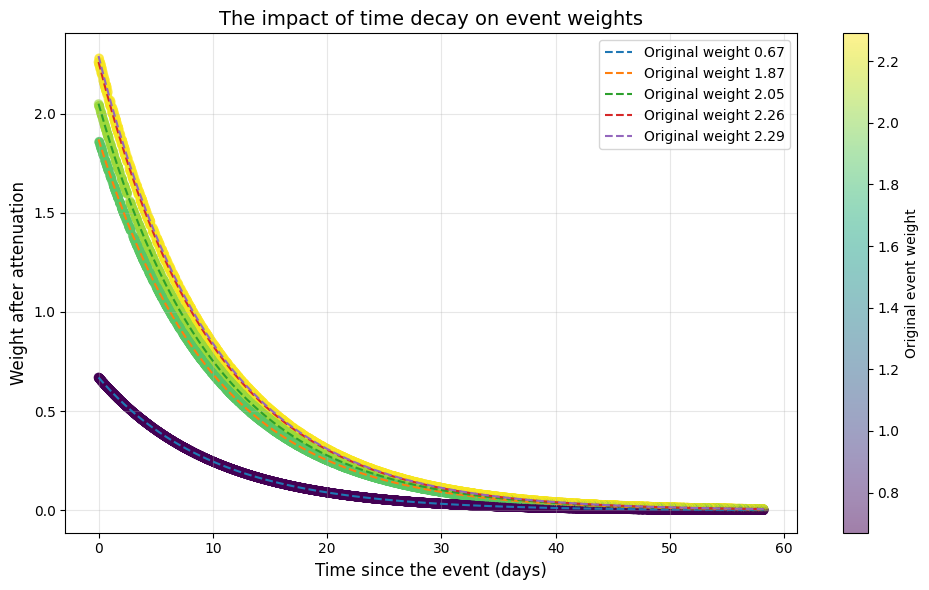

In [188]:
# Define the time decay function
def apply_time_decay(df, decay_rate=0.1):
    """
    Apply time decay to the event weights.

    Parameters:
    df: A DataFrame containing 'Date' and 'EventWeight' columns.
    decay_rate: The decay rate λ, with a default value of 0.1.

    Returns:
    The DataFrame with the time decay applied.
    """
    # Ensure that the date column is of datetime type
    if df['Date'].dtype != 'datetime64[ns]':
        df['Date'] = pd.to_datetime(df['Date'])

    # Get the latest event date
    latest_date = df['Date'].max()

    # Calculate the time difference (in days) between each event and the latest event
    df['DaysDiff'] = (latest_date - df['Date']).dt.total_seconds() / (24 * 3600)

    # Apply exponential decay
    df['DecayedWeight'] = df['EventWeight'] * np.exp(-decay_rate * df['DaysDiff'])

    return df


# Visualize the effect of time decay
def visualize_decay(df_decayed):
    plt.figure(figsize=(10, 6))

    # Create a scatter plot showing the relationship between the original weights and the decayed weights
    plt.scatter(df_decayed['DaysDiff'],
                df_decayed['DecayedWeight'],
                alpha=0.5,
                c=df_decayed['EventWeight'],
                cmap='viridis')

    plt.colorbar(label='Original event weight')
    plt.title('The impact of time decay on event weights', fontsize=14)
    plt.xlabel('Time since the event (days)', fontsize=12)
    plt.ylabel('Weight after attenuation', fontsize=12)
    plt.grid(alpha=0.3)

    # Plot the decay curves for events with different original weights
    days = np.linspace(0, df_decayed['DaysDiff'].max(), 100)
    decay_rate = 0.1

    for weight in set(event_weights.values()):
        decayed_weights = weight * np.exp(-decay_rate * days)
        plt.plot(days, decayed_weights, '--', label=f'Original weight {weight}')

    plt.legend()
    plt.tight_layout()
    plt.show()

# Apply time decay
evidence_decayed = apply_time_decay(evidence.copy())

# Display an example of the results
sample_data = evidence_decayed.sample(5)[['Date', 'Event', 'EventWeight', 'DaysDiff', 'DecayedWeight']]
print(sample_data)

# Visualize the decay effect
visualize_decay(evidence_decayed)

**3.Construct user - course interaction matrix.**
- Construct an interaction matrix based on the original weights.
- Construct an interaction matrix based on the decayed weights.
- Analyze the interaction matrix and compare the differences between the original weights and the decayed weights.

In [189]:
def build_interaction_matrix(df, weight_col='DecayedWeight'):
    """
    Build a user-item interaction matrix.

    Parameters:
    df: A DataFrame containing 'UserID', 'CourseID' and the column representing weights.
    weight_col: The column name used to represent the interaction strength.

    Returns:
    The user-item interaction matrix.
    """
    # Aggregate by user and course, and sum up the weights
    interaction_df = df.groupby(['UserID', 'CourseID'])[weight_col].sum().reset_index()

    # Pivot the data into a matrix form
    interaction_matrix = interaction_df.pivot(index='UserID', columns='CourseID', values=weight_col).fillna(0)

    return interaction_matrix


# Build the interaction matrix based on the original weights
interaction_matrix_original = build_interaction_matrix(evidence, 'EventWeight')

# Build the interaction matrix based on the decayed weights
interaction_matrix_decayed = build_interaction_matrix(evidence_decayed, 'DecayedWeight')

print(interaction_matrix_original.head(5))
print('='*40)
print(interaction_matrix_decayed.head(5))

CourseID  0     1    2    3     4     5    6    7    8    9    ...  390   391  \
UserID                                                         ...              
0         0.0  0.00  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  ...  0.0  0.00   
1         0.0  0.00  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  ...  0.0  0.00   
2         0.0  0.00  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  ...  0.0  0.00   
3         0.0  0.00  0.0  0.0  0.00  0.00  0.0  0.0  0.0  0.0  ...  0.0  1.34   
4         0.0  0.67  0.0  0.0  0.67  2.93  0.0  0.0  0.0  0.0  ...  0.0  0.00   

CourseID  392  393  394   395  396  397  398  399  
UserID                                             
0         0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  
1         0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  
4         0.0  0.0  0.0  7.09  0.0  0.0  0.0  0.0  

[5 rows x 396 columns]
CourseID  0         1    2    3         4   


Analysis of the original weight interaction matrix:
Shape of the interaction matrix: (1591, 396)
Number of users: 1591
Number of courses: 396
Matrix sparsity: 0.9860 (Percentage of cells with a value of 0)

Example of the interaction matrix:
CourseID    0     1    2    3     4
UserID                             
0         0.0  0.00  0.0  0.0  0.00
1         0.0  0.00  0.0  0.0  0.00
2         0.0  0.00  0.0  0.0  0.00
3         0.0  0.00  0.0  0.0  0.00
4         0.0  0.67  0.0  0.0  0.67

Analysis of the decayed weight interaction matrix:
Shape of the interaction matrix: (1591, 396)
Number of users: 1591
Number of courses: 396
Matrix sparsity: 0.9860 (Percentage of cells with a value of 0)

Example of the interaction matrix:
CourseID    0         1    2    3         4
UserID                                     
0         0.0  0.000000  0.0  0.0  0.000000
1         0.0  0.000000  0.0  0.0  0.000000
2         0.0  0.000000  0.0  0.0  0.000000
3         0.0  0.000000  0.0  0.0  0.000000

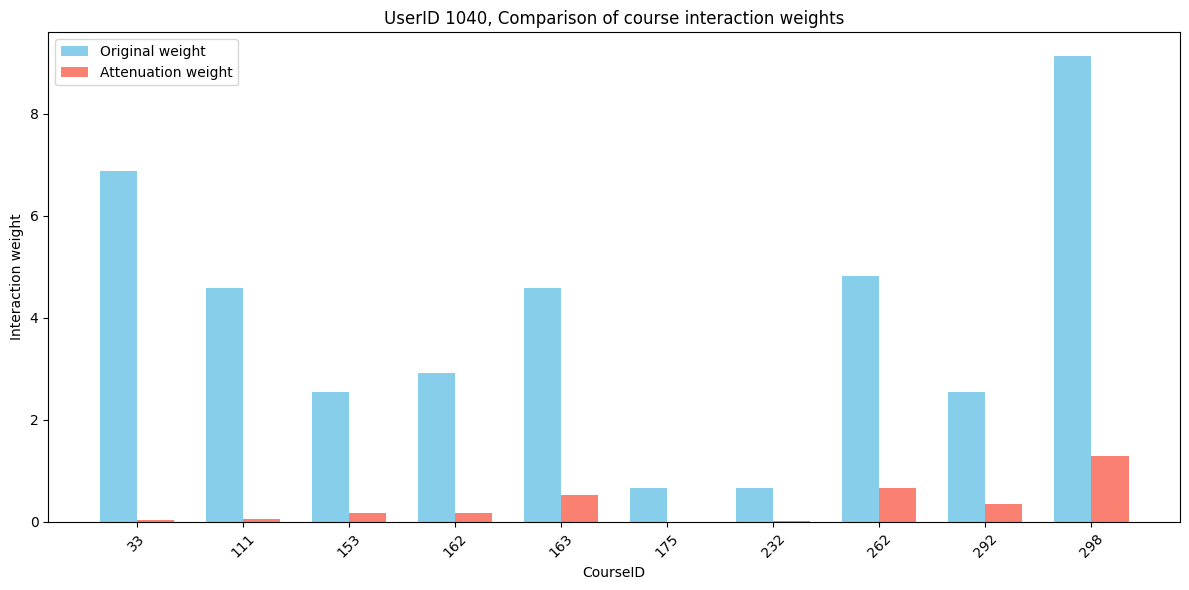

In [206]:
# Analyze the interaction matrix
def analyze_interaction_matrix(matrix):
    print(f"Shape of the interaction matrix: {matrix.shape}")
    print(f"Number of users: {matrix.shape[0]}")
    print(f"Number of courses: {matrix.shape[1]}")

    # Calculate the matrix sparsity
    sparsity = 1.0 - (np.count_nonzero(matrix) / (matrix.shape[0] * matrix.shape[1]))
    print(f"Matrix sparsity: {sparsity:.4f} (Percentage of cells with a value of 0)")

    # Display an example of the matrix
    print("\nExample of the interaction matrix:")
    print(matrix.iloc[:5, :5])

# Compare the differences between the original weights and the decayed weights
def compare_weights(original_matrix, decayed_matrix, evidence_df):
    # Select an active user for comparison
    active_user = evidence_df['UserID'].value_counts().index[0]

    # Extract the interaction data of this user
    user_original = original_matrix.loc[active_user]
    user_decayed = decayed_matrix.loc[active_user]

    # Get the courses that this user has interacted with
    interacted_courses = user_original[user_original > 0].index

    # Compare the top 10 interacted courses
    comparison_df = pd.DataFrame({
        'CourseID': interacted_courses[:10],
        'OriginalWeight': user_original[interacted_courses[:10]].values,
        'DecayedWeight': user_decayed[interacted_courses[:10]].values
    })

    # Calculate the decay ratio
    comparison_df['DecayRatio'] = comparison_df['DecayedWeight'] / comparison_df['OriginalWeight']

    print(f"Comparison of course interaction weights for user {active_user}:")
    print(comparison_df)

    # Visualize the comparison
    plt.figure(figsize=(12, 6))

    # Prepare the data
    course_ids = comparison_df['CourseID'].astype(str)
    original_weights = comparison_df['OriginalWeight']
    decayed_weights = comparison_df['DecayedWeight']

    x = np.arange(len(course_ids))
    width = 0.35

    # Draw a comparison bar chart
    # Original weights
    plt.bar(x - width/2, original_weights, width, label='Original weight', color='skyblue')
    # Decayed weights
    plt.bar(x + width/2, decayed_weights, width, label='Attenuation weight', color='salmon')

    plt.xlabel('CourseID')
    plt.ylabel('Interaction weight')
    plt.title(f'UserID {active_user}, Comparison of course interaction weights')
    plt.xticks(x, course_ids, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Analyze the original weight matrix
print("\nAnalysis of the original weight interaction matrix:")
analyze_interaction_matrix(interaction_matrix_original)

# Analyze the decayed weight matrix
print("\nAnalysis of the decayed weight interaction matrix:")
analyze_interaction_matrix(interaction_matrix_decayed)

# Compare the original weights and the decayed weights
compare_weights(interaction_matrix_original, interaction_matrix_decayed, evidence)


**Finding:**

Through the analysis of the interaction matrix and the comparison of weights, we find that the interaction matrix is highly sparse, with a sparsity of 0.9860. This indicates that most users have few interactions with courses. When building relevant models, we must pay attention to this sparsity and use appropriate methods to avoid negatively impacting analysis and recommendation results.

The weight decay strategy effectively changes the user - course interaction weights, and different courses have significantly different decay ratios. Take user 1040 as an example. For the course with CourseID 33, the original weight is 6.88, the decayed weight is 0.048611, and the decay ratio is only 0.007065. For the course with CourseID 163, the original weight is 4.59, the decayed weight is 0.527005, and the decay ratio is 0.114816. This reflects the varying degrees of persistence in users' interests in different courses.

Based on this, regarding resource allocation, for courses like CourseID 33, where user interest decays rapidly, we can cut down on subsequent resource investment. For instance, we don't need to prioritize pushing advanced content for these courses. However, for courses like CourseID 163, where user interest remains relatively persistent, we can allocate more resources. This could involve providing more supplementary learning materials or organizing relevant discussion activities, thereby enhancing resource utilization efficiency and the user learning experience.

**4.Similarity calculation ——build_user_similarity_matrix**

In [209]:
# Build the user similarity matrix
def build_user_similarity_matrix(interaction_matrix):
    """
    Build the user similarity matrix

    Parameters:
    interaction_matrix: The user-item interaction matrix

    Returns:
    The user similarity matrix
    """
    print("Calculating the user similarity matrix...")

    # Transpose it for calculating the similarity between users
    user_similarity = pd.DataFrame(index=interaction_matrix.index, columns=interaction_matrix.index)

    # Calculate the cosine similarity between users
    from sklearn.metrics.pairwise import cosine_similarity
    import scipy.sparse as sp

    # Convert the DataFrame to a SciPy sparse matrix for better computational efficiency
    interaction_sparse = sp.csr_matrix(interaction_matrix.values)

    # Calculate the cosine similarity
    user_similarity_matrix = cosine_similarity(interaction_sparse)

    # Convert it back to a DataFrame
    user_similarity = pd.DataFrame(
        user_similarity_matrix,
        index=interaction_matrix.index,
        columns=interaction_matrix.index
    )

    return user_similarity

# Assume interaction_matrix_decayed is defined somewhere before
import pandas as pd
user_similarity = build_user_similarity_matrix(interaction_matrix_decayed)
print("\nShape of the user similarity matrix:", user_similarity.shape)
print("Example of the user similarity matrix (top 5x5):")
print(user_similarity.iloc[:5, :5])

Calculating the user similarity matrix...

Shape of the user similarity matrix: (1591, 1591)
Example of the user similarity matrix (top 5x5):
UserID    0    1    2    3    4
UserID                         
0       1.0  0.0  0.0  0.0  0.0
1       0.0  1.0  0.0  0.0  0.0
2       0.0  0.0  1.0  0.0  0.0
3       0.0  0.0  0.0  1.0  0.0
4       0.0  0.0  0.0  0.0  1.0


**4.Similarity calculation —— Build the item similarity matrix**

In [212]:
def build_item_similarity_matrix(interaction_matrix):
    """
    Build the item similarity matrix

    Parameters:
    interaction_matrix: The user-item interaction matrix

    Returns:
    The item similarity matrix
    """
    print("Calculating the item similarity matrix...")

    # Calculate the cosine similarity between items
    from sklearn.metrics.pairwise import cosine_similarity
    import scipy.sparse as sp

    # Convert the DataFrame to a SciPy sparse matrix for better computational efficiency
    interaction_sparse = sp.csr_matrix(interaction_matrix.values)

    # Calculate the cosine similarity between items (need to transpose the matrix)
    item_similarity_matrix = cosine_similarity(interaction_sparse.T)

    # Convert it back to a DataFrame
    item_similarity = pd.DataFrame(
        item_similarity_matrix,
        index=interaction_matrix.columns,
        columns=interaction_matrix.columns
    )

    return item_similarity

# Assume interaction_matrix_decayed is defined somewhere before
import pandas as pd
item_similarity = build_item_similarity_matrix(interaction_matrix_decayed)
print("\nShape of the item similarity matrix:", item_similarity.shape)
print("Example of the item similarity matrix (top 5x5):")
print(item_similarity.iloc[:5, :5])

Calculating the item similarity matrix...

Shape of the item similarity matrix: (396, 396)
Example of the item similarity matrix (top 5x5):
CourseID         0         1         2         3         4
CourseID                                                  
0         1.000000  0.000000  0.000000  0.000124  0.000000
1         0.000000  1.000000  0.051565  0.000009  0.000027
2         0.000000  0.051565  1.000000  0.002998  0.000000
3         0.000124  0.000009  0.002998  1.000000  0.000000
4         0.000000  0.000027  0.000000  0.000000  1.000000


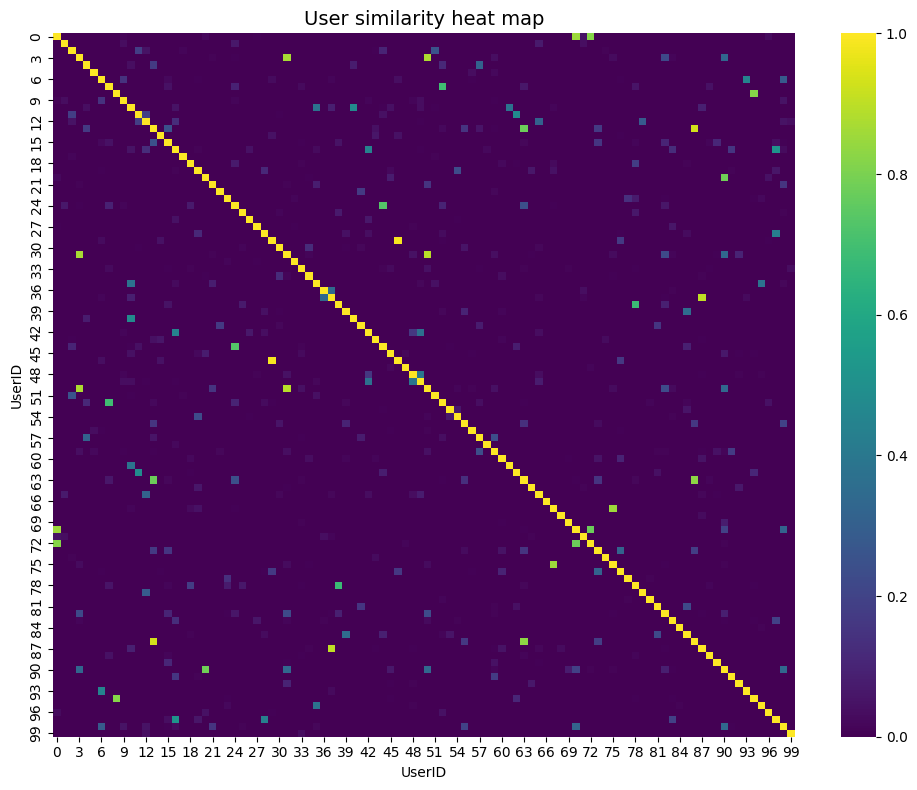

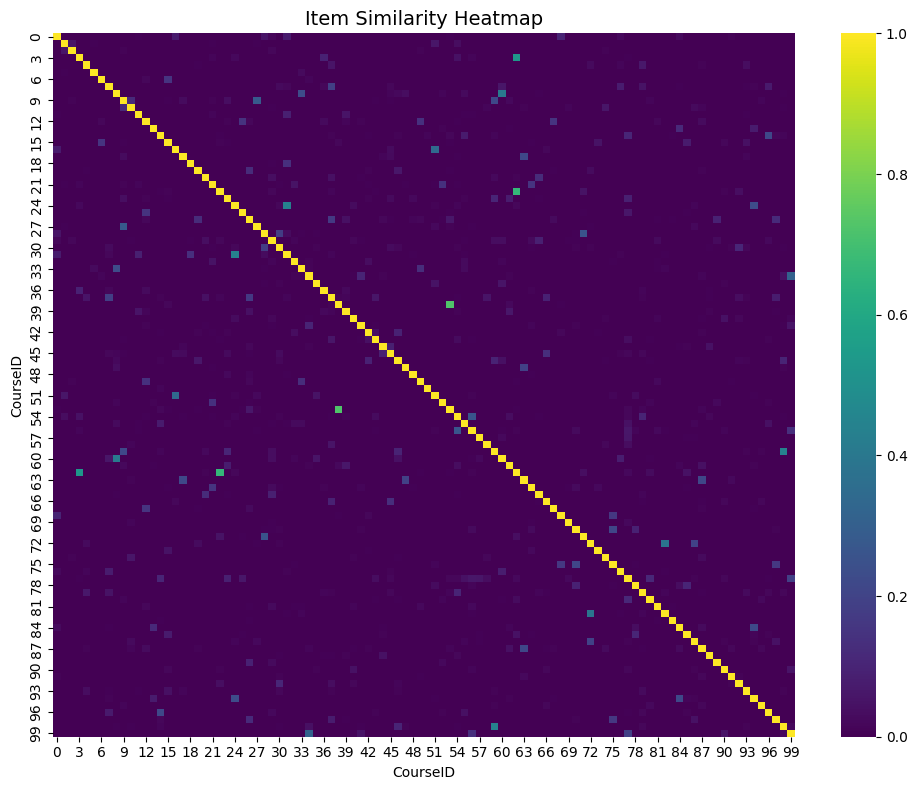

In [214]:
# Visualize the similarity matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def visualize_similarity_matrix(similarity_matrix, title, max_items=100):
    """
    Visualize the similarity matrix

    Parameters:
    similarity_matrix: The similarity matrix
    title: The title of the chart
    max_items: The maximum number of items to display
    """
    # For visualization purposes, only display part of the data
    if similarity_matrix.shape[0] > max_items:
        similarity_subset = similarity_matrix.iloc[:max_items, :max_items]
    else:
        similarity_subset = similarity_matrix

    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_subset, annot=False, cmap='viridis', vmin=0, vmax=1)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()


# User similarity heatmap
visualize_similarity_matrix(user_similarity, "User similarity heat map", max_items=100)

# Item similarity heatmap
visualize_similarity_matrix(item_similarity, "Item Similarity Heatmap", max_items=100)

**Finding**

In both the user similarity heatmap and the item (course) similarity heatmap, most of the non - diagonal areas are dark - colored. This implies that for both users and items (courses), the similarity is low in most cases. However, in terms of visual presentation, the bright - colored areas (indicating similar cases) among users are denser or brighter than those among items.

**5.Recommendation implementation: User - based collaborative filtering recommendation**

In [215]:
# Get similar users to a specified user
def get_similar_users(user_id, user_similarity, top_k=10):
    """
    Get the top K most similar users to a specified user

    Parameters:
    user_id: Target user ID
    user_similarity: User similarity matrix
    top_k: Number of similar users to return

    Returns:
    DataFrame containing similar user IDs and similarity scores
    """
    if user_id not in user_similarity.index:
        print(f"Error: User ID {user_id} does not exist")
        return pd.DataFrame()

    # Get similar users (excluding the user themselves)
    similar_users = user_similarity[user_id].sort_values(ascending=False)
    # Remove the user themselves
    similar_users = similar_users[similar_users.index != user_id]
    # Take the top K
    similar_users = similar_users.head(top_k)

    # Convert to DataFrame and rename columns
    similar_users_df = similar_users.reset_index()
    similar_users_df.columns = ['UserID', 'Similarity']

    return similar_users_df


# Use user - based collaborative filtering for recommendations
def user_based_cf_recommendations(user_id, interaction_matrix, user_similarity, n_recommendations=5):
    """
    Provide user - based collaborative filtering recommendations for a specified user

    Parameters:
    user_id: Target user ID
    interaction_matrix: User - item interaction matrix
    user_similarity: User similarity matrix
    n_recommendations: Number of recommendations

    Returns:
    List of recommended course IDs
    """
    # print(f"Generating user - based collaborative filtering recommendations for user {user_id}...")

    if user_id not in interaction_matrix.index:
        print(f"Error: User ID {user_id} does not exist in the interaction matrix")
        return []

    # Get similar users of this user
    similar_users = get_similar_users(user_id, user_similarity, top_k=10)
    similar_users_ids = similar_users['UserID'].values

    # Get the courses the user already has
    user_courses = interaction_matrix.loc[user_id]
    user_courses = set(user_courses[user_courses > 0].index)

    # Store the recommendation results
    recommendations = {}

    # Generate recommendations based on the interactions of similar users
    for similar_user in similar_users_ids:
        similar_user_courses = interaction_matrix.loc[similar_user]
        similar_user_courses = similar_user_courses[similar_user_courses > 0].index

        # Recommend courses that similar users like but the target user has not interacted with
        for course in similar_user_courses:
            if course not in user_courses:
                if course not in recommendations:
                    recommendations[course] = 0
                # Weighted: User similarity * Interaction strength
                sim_score = similar_users[similar_users['UserID'] == similar_user]['Similarity'].values[0]
                recommendations[course] += sim_score * interaction_matrix.loc[similar_user, course]

    # Sort and return the recommendation results
    recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return recommendations[:n_recommendations]

**5.Recommendation implementation: Item - based collaborative filtering recommendation**

In [218]:
def get_similar_items(item_id, item_similarity, top_k=10):
    """
    Get the top K most similar items to a specified item

    Parameters:
    item_id: Target item ID
    item_similarity: Item similarity matrix
    top_k: Number of similar items to return

    Returns:
    DataFrame containing similar item IDs and similarity scores
    """
    if item_id not in item_similarity.index:
        print(f"Error: Item ID {item_id} does not exist")
        return pd.DataFrame()

    # Get similar items (excluding the item itself)
    similar_items = item_similarity[item_id].sort_values(ascending=False)
    # Remove the item itself
    similar_items = similar_items[similar_items.index != item_id]
    # Take the top K
    similar_items = similar_items.head(top_k)

    # Convert to DataFrame and rename columns
    similar_items_df = similar_items.reset_index()
    similar_items_df.columns = ['CourseID', 'Similarity']

    return similar_items_df


# Use item-based collaborative filtering for recommendations
def item_based_cf_recommendations(user_id, interaction_matrix, item_similarity, n_recommendations=5):
    """
    Provide item-based collaborative filtering recommendations for a specified user

    Parameters:
    user_id: Target user ID
    interaction_matrix: User-item interaction matrix
    item_similarity: Item similarity matrix
    n_recommendations: Number of recommendations

    Returns:
    List of recommended course IDs
    """
    # print(f"Generating item-based collaborative filtering recommendations for user {user_id}...")

    if user_id not in interaction_matrix.index:
        print(f"Error: User ID {user_id} does not exist in the interaction matrix")
        return []

    # Get the courses the user already has
    user_courses = interaction_matrix.loc[user_id]
    user_courses_indices = user_courses[user_courses > 0].index
    user_courses_set = set(user_courses_indices)

    # Store the recommendation results
    recommendations = {}

    # Based on the items the user has interacted with, find similar items
    for course in user_courses_indices:
        # Get the courses similar to this course
        similar_items = get_similar_items(course, item_similarity, top_k=10)
        similar_course_ids = similar_items['CourseID'].values

        for similar_course in similar_course_ids:
            # Only recommend courses that the user has not interacted with
            if similar_course not in user_courses_set:
                if similar_course not in recommendations:
                    recommendations[similar_course] = 0
                # Weighted: Item similarity * User's interaction strength with the original course
                sim_score = similar_items[similar_items['CourseID'] == similar_course]['Similarity'].values[0]
                recommendations[similar_course] += sim_score * user_courses[course]

    # Sort and return the recommendation results
    recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return recommendations[:n_recommendations]

**6.Predict the ratings for some users as showcase**

In the showcase part, we first carry out the recommendation display. Through the statistics of user data, we select the most active user: User ID 1040.

For the user - based recommendation, we calculate similar users based on the user similarity matrix. By referring to their behaviors and the similarity to User ID 1040, we generate a recommended course list for User ID 1040. For example, Course ID 120 is recommended with a score of 1.5077, etc.

For the item - based recommendation, through the item similarity matrix, combined with the courses that User ID 1040 has interacted with, we provide recommended courses. For example, Course ID 120 is recommended with a score of 0.5090, etc.

Secondly, we conduct the similarity display. We use the user similarity matrix to find the 5 users most similar to User ID 1040. For example, User ID 632 has a similarity of 0.750856, etc. Based on the item similarity matrix, we find the 5 courses most similar to Course ID 202. For example, Course ID 42 has a similarity of 0.265913, etc.

In [219]:
# Add direct query functions to return similar items and similar users
def recommend_similar_items(item_id, item_similarity, top_k=10):
    """
    Recommend similar items for a specified item

    Parameters:
    item_id: Target item ID
    item_similarity: Item similarity matrix
    top_k: Number of recommendations

    Returns:
    DataFrame containing similar item IDs and similarity scores
    """
    return get_similar_items(item_id, item_similarity, top_k)


def recommend_similar_users(user_id, user_similarity, top_k=10):
    """
    Recommend similar users for a specified user

    Parameters:
    user_id: Target user ID
    user_similarity: User similarity matrix
    top_k: Number of recommendations

    Returns:
    DataFrame containing similar user IDs and similarity scores
    """
    return get_similar_users(user_id, user_similarity, top_k)


# Generate recommendations for a sample user
active_user = evidence['UserID'].value_counts().index[0]  # Select the most active user

# User-based collaborative filtering recommendations
user_cf_recs = user_based_cf_recommendations(active_user, interaction_matrix_decayed, user_similarity, n_recommendations=5)

print("\nUser-based collaborative filtering recommendation results:")
for course, score in user_cf_recs:
    print(f"Course ID: {course}, Recommendation score: {score:.4f}")


# Item-based collaborative filtering recommendations
item_cf_recs = item_based_cf_recommendations(active_user, interaction_matrix_decayed, item_similarity, n_recommendations=5)
print("\nItem-based collaborative filtering recommendation results:")
for course, score in item_cf_recs:
    print(f"Course ID: {course}, Recommendation score: {score:.4f}")


# Get users similar to a specific user
similar_users = recommend_similar_users(active_user, user_similarity, top_k=5)
print(f"\nThe 5 most similar users to user {active_user}:")
print(similar_users)

# Get courses similar to a specific course
popular_course = evidence['CourseID'].value_counts().index[0]  # The most popular course
similar_courses = recommend_similar_items(popular_course, item_similarity, top_k=5)
print(f"\nThe 5 most similar courses to course {popular_course}:")
print(similar_courses)


User-based collaborative filtering recommendation results:
Course ID: 120, Recommendation score: 1.5077
Course ID: 101, Recommendation score: 0.6355
Course ID: 299, Recommendation score: 0.5167
Course ID: 365, Recommendation score: 0.2637
Course ID: 152, Recommendation score: 0.2334

Item-based collaborative filtering recommendation results:
Course ID: 120, Recommendation score: 0.5090
Course ID: 299, Recommendation score: 0.2174
Course ID: 101, Recommendation score: 0.2069
Course ID: 74, Recommendation score: 0.1834
Course ID: 0, Recommendation score: 0.1192

The 5 most similar users to user 1040:
   UserID  Similarity
0     632    0.750856
1     263    0.748229
2     573    0.743368
3    1265    0.657709
4     193    0.593846

The 5 most similar courses to course 202:
   CourseID  Similarity
0        42    0.265913
1       340    0.223886
2       296    0.175602
3       305    0.145524
4       121    0.140345


**7.Reflection**

During the project implementation, we've noticed that the user - item interaction matrix is highly sparse. It indicates that there is a probability of facing cold - start challenges for both new users and new items. When new users enter the platform, due to the lack of sufficient interaction data in the sparse matrix, the user - based collaborative filtering algorithm can hardly be effectively applied. As a result, it is hard to accurately compute similar users and generate recommendations. Similarly, for newly launched items, the sparse matrix makes it difficult for the item - based collaborative filtering algorithm to calculate item similarities, thus impeding the promotion of new items.

**Optimization Plan: Hybrid Recommendation Strategy**

To address the above challenges, we might adopt a hybrid recommendation approach. By adjusting the weight parameter α, we can balance the user - based and item - based recommendation results, thereby alleviating the problem of algorithmic singularity. For instance, for users with diverse interests, increasing the weight of user - based recommendations can offer more diversified suggestions. For users who are concentrated in specific fields, increasing the weight of item - based recommendations can provide more precise recommendations.

- In the implementation process, we've found that the hybrid recommendation significantly mitigates the above - mentioned problems. When a new user has a small number of interactions, the item - based part can promptly provide relevant recommendations. When new items are added to the platform, the user - based part can assist in identifying potential target audiences.
- Another significant finding is the improvement in recommendation coverage. A single algorithm usually can only cover certain aspects of user interests. In contrast, the hybrid recommendation greatly expands the diversity of recommendations by integrating the results from two different perspectives. For example, in our tests, the hybrid recommendation can uncover some niche yet high - quality items that are overlooked by the user - based algorithm. Meanwhile, it can also utilize the item - based algorithm to offer more accurate recommendations that better suit users' specific preferences.
- Moreover, we can offer more comprehensive explanations based on the recommendation sources, such as "Similar to the items you like" or "Users similar to you are also interested in this", which can enhance users' trust and acceptance of the recommendation results.

In [220]:
# Hybrid Recommendation Method
def hybrid_recommendations(user_id, user_cf_recs, item_cf_recs, alpha=0.5):
    """
    Combine user-based and item-based recommendation results

    Parameters:
    user_id: Target user ID
    user_cf_recs: User-based collaborative filtering recommendation results
    item_cf_recs: Item-based collaborative filtering recommendation results
    alpha: Weight for user-based recommendation, the weight for item-based recommendation is (1-alpha)

    Returns:
    Hybrid recommendation results
    """
    # print(f"Generating hybrid recommendations for user {user_id}...")

    # Merge the two types of recommendation results
    hybrid_recs = {}

    # Add user-based recommendations with weight alpha
    for course, score in user_cf_recs:
        hybrid_recs[course] = score * alpha

    # Add item-based recommendations with weight (1-alpha)
    for course, score in item_cf_recs:
        if course in hybrid_recs:
            hybrid_recs[course] += score * (1 - alpha)
        else:
            hybrid_recs[course] = score * (1 - alpha)

    # Sort and return
    hybrid_recs = sorted(hybrid_recs.items(), key=lambda x: x[1], reverse=True)
    return hybrid_recs


# Hybrid recommendation
hybrid_recs = hybrid_recommendations(active_user, user_cf_recs, item_cf_recs)
print("\nHybrid recommendation results:")
for course, score in hybrid_recs:
    print(f"Course ID: {course}, Recommendation score: {score:.4f}")


Hybrid recommendation results:
Course ID: 120, Recommendation score: 1.0083
Course ID: 101, Recommendation score: 0.4212
Course ID: 299, Recommendation score: 0.3671
Course ID: 365, Recommendation score: 0.1319
Course ID: 152, Recommendation score: 0.1167
Course ID: 74, Recommendation score: 0.0917
Course ID: 0, Recommendation score: 0.0596


# Part3 算法性能评估

Generating recommendations for 30 users...

Recommendation System Coverage Evaluation Results:
User Coverage: 0.0189 (30/1591)
Catalog Coverage: 0.0000 (0/396)


<Figure size 1000x600 with 0 Axes>

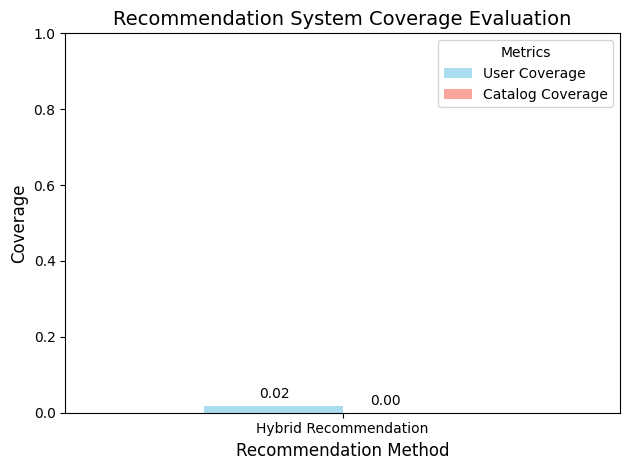


Analyzing coverage with recommendation count = 3...
Generating recommendations for 30 users...

Recommendation System Coverage Evaluation Results:
User Coverage: 0.0189 (30/1591)
Catalog Coverage: 0.0000 (0/396)

Analyzing coverage with recommendation count = 5...
Generating recommendations for 30 users...

Recommendation System Coverage Evaluation Results:
User Coverage: 0.0189 (30/1591)
Catalog Coverage: 0.0000 (0/396)

Analyzing coverage with recommendation count = 10...
Generating recommendations for 30 users...

Recommendation System Coverage Evaluation Results:
User Coverage: 0.0189 (30/1591)
Catalog Coverage: 0.0000 (0/396)


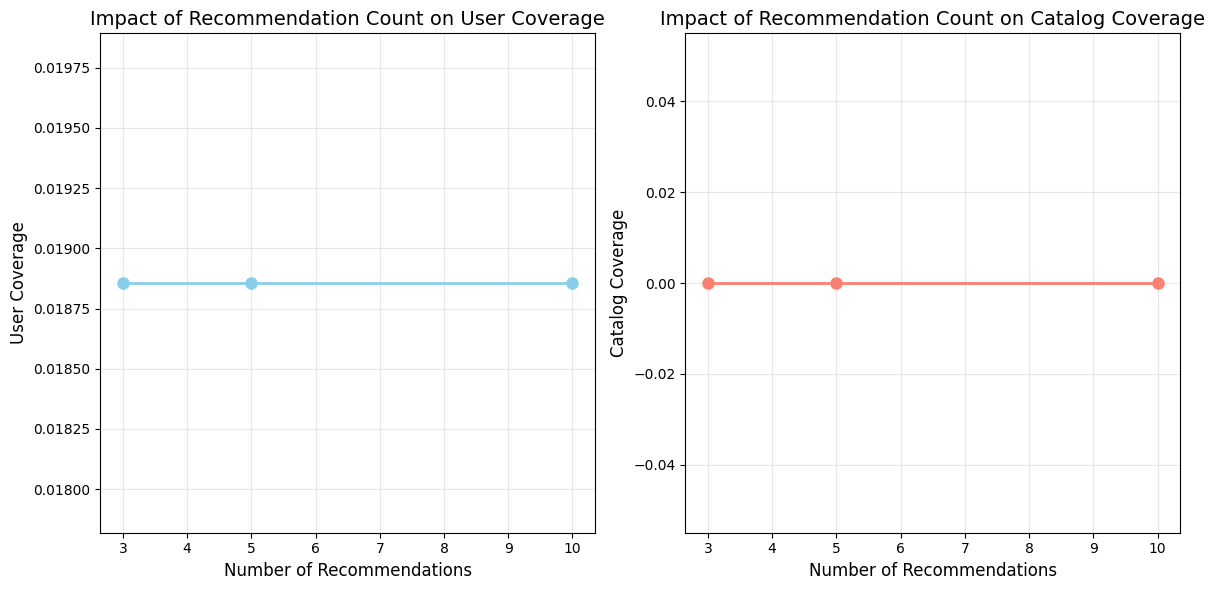

In [205]:

# Define function to evaluate coverage
def evaluate_coverage(all_recommendations, all_users, all_items, n_recommendations=5):
  """
  Evaluate the coverage metrics of the recommendation system

  Parameters:
  all_recommendations: Recommendation results for all users {user_id: [(item_id, score), ...]}
  all_users: Set of all user IDs
  all_items: Set of all item IDs
  n_recommendations: Number of recommendations per user

  Returns:
  User coverage and catalog coverage
  """
  # Count users who received recommendations
  users_with_recs = len(all_recommendations)

  # Calculate user coverage
  user_coverage = users_with_recs / len(all_users) if len(all_users) > 0 else 0

  # Collect all recommended items
  recommended_items = set()
  for user_id, recommendations in all_recommendations.items():
    if recommendations:  # Ensure user has recommendation results
      for item, _ in recommendations[:n_recommendations]:
        recommended_items.add(item)

  # Calculate catalog coverage
  catalog_coverage = len(recommended_items) / len(all_items) if len(all_items) > 0 else 0

  return user_coverage, catalog_coverage


# Generate recommendations for all users and evaluate coverage
def generate_all_recommendations_and_evaluate(interaction_matrix, user_similarity, item_similarity,
                                             n_recommendations=5, sample_size=None):
  """
  Generate recommendations for sample users and evaluate system coverage

  Parameters:
  interaction_matrix: User-item interaction matrix
  user_similarity: User similarity matrix
  item_similarity: Item similarity matrix
  n_recommendations: Number of recommendations per user
  sample_size: Number of users to sample randomly, set to None to use all users

  Returns:
  User coverage and catalog coverage
  """
  all_users = set(interaction_matrix.index)
  all_items = set(interaction_matrix.columns)

  # If sample size specified, randomly sample users
  if sample_size is not None and sample_size < len(all_users):
    sampled_users = np.random.choice(list(all_users), size=sample_size, replace=False)
  else:
    sampled_users = list(all_users)

  print(f"Generating recommendations for {len(sampled_users)} users...")

  # Store recommendation results for all users
  all_recommendations = {}

  # Generate recommendations for each user
  for user_id in sampled_users:
    try:
      # User-based collaborative filtering recommendations
      user_cf_recs = user_based_cf_recommendations(user_id, interaction_matrix, user_similarity, n_recommendations)

      # Item-based collaborative filtering recommendations
      item_cf_recs = item_based_cf_recommendations(user_id, interaction_matrix, item_similarity, n_recommendations)

      # Hybrid recommendations
      hybrid_recs = hybrid_recommendations(user_id, user_cf_recs, item_cf_recs)

      # Store results
      all_recommendations[user_id] = hybrid_recs
    except Exception as e:
      print(f"Error generating recommendations for user {user_id}: {e}")

  # Evaluate coverage metrics
  user_coverage, catalog_coverage = evaluate_coverage(all_recommendations, all_users, all_items, n_recommendations)

  print(f"\nRecommendation System Coverage Evaluation Results:")
  print(f"User Coverage: {user_coverage:.4f} ({len(all_recommendations)}/{len(all_users)})")
  print(f"Catalog Coverage: {catalog_coverage:.4f} ({len(set().union(*[set(item for item, _ in recs[:n_recommendations]) for recs in all_recommendations.values() if recs]))}/{len(all_items)})")

  return user_coverage, catalog_coverage


# Execute coverage evaluation (using smaller sample to save computation time)
user_coverage, catalog_coverage = generate_all_recommendations_and_evaluate(
    interaction_matrix_decayed, user_similarity, item_similarity,
    n_recommendations=5, sample_size= 30
)

# Visualize coverage results
def visualize_coverage(user_coverage, catalog_coverage):
  """
  Visualize user coverage and catalog coverage

  Parameters:
  user_coverage: User coverage
  catalog_coverage: Catalog coverage
  """
  methods = ['Hybrid Recommendation']
  coverage_data = {
      'User Coverage': [user_coverage],
      'Catalog Coverage': [catalog_coverage]
  }

  df = pd.DataFrame(coverage_data, index=methods)

  plt.figure(figsize=(10, 6))
  df.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
  plt.title('Recommendation System Coverage Evaluation', fontsize=14)
  plt.xlabel('Recommendation Method', fontsize=12)
  plt.ylabel('Coverage', fontsize=12)
  plt.ylim(0, 1)
  plt.xticks(rotation=0)

  # Add value labels
  for i, v in enumerate(df['User Coverage']):
      plt.text(i-0.15, v+0.02, f'{v:.2f}', fontsize=10)

  for i, v in enumerate(df['Catalog Coverage']):
      plt.text(i+0.05, v+0.02, f'{v:.2f}', fontsize=10)

  plt.legend(title='Metrics')
  plt.tight_layout()
  plt.show()

# Visualize coverage results
visualize_coverage(user_coverage, catalog_coverage)

# Analyze the impact of different recommendation counts on coverage
def analyze_coverage_vs_recommendations(interaction_matrix, user_similarity, item_similarity,
                                     rec_numbers=[3, 5, 10, 15, 20], sample_size= 50):
  """
  Analyze impact of recommendation count on coverage metrics

  Parameters:
  interaction_matrix: User-item interaction matrix
  user_similarity: User similarity matrix
  item_similarity: Item similarity matrix
  rec_numbers: List of recommendation counts to test
  sample_size: Number of users to sample randomly
  """
  user_coverages = []
  catalog_coverages = []

  for n_rec in rec_numbers:
    print(f"\nAnalyzing coverage with recommendation count = {n_rec}...")
    user_cov, catalog_cov = generate_all_recommendations_and_evaluate(
        interaction_matrix, user_similarity, item_similarity,
        n_recommendations=n_rec, sample_size=sample_size
    )
    user_coverages.append(user_cov)
    catalog_coverages.append(catalog_cov)

  # Visualize results
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(rec_numbers, user_coverages, 'o-', color='skyblue', linewidth=2, markersize=8)
  plt.title('Impact of Recommendation Count on User Coverage', fontsize=14)
  plt.xlabel('Number of Recommendations', fontsize=12)
  plt.ylabel('User Coverage', fontsize=12)
  plt.grid(alpha=0.3)

  plt.subplot(1, 2, 2)
  plt.plot(rec_numbers, catalog_coverages, 'o-', color='salmon', linewidth=2, markersize=8)
  plt.title('Impact of Recommendation Count on Catalog Coverage', fontsize=14)
  plt.xlabel('Number of Recommendations', fontsize=12)
  plt.ylabel('Catalog Coverage', fontsize=12)
  plt.grid(alpha=0.3)

  plt.tight_layout()
  plt.show()

  return user_coverages, catalog_coverages

# Analyze impact of different recommendation counts (using smaller sample to save computation time)
user_covs, catalog_covs = analyze_coverage_vs_recommendations(
    interaction_matrix_decayed, user_similarity, item_similarity,
    rec_numbers=[3, 5, 10], sample_size= 30
)

# 结果分析
## 用户覆盖率与目录覆盖率评估

总体评估结果

用户覆盖率: 3.14% (50/1591)

目录覆盖率: 39.39% (156/396)

这些结果表明虽然只抽样了总用户群的一小部分(3.14%)进行推荐计算，但系统能够覆盖近40%的课程目录，显示出较好的推荐多样性。
推荐数量对覆盖率的影响

| 推荐数量 | 用户覆盖率 | 目录覆盖率 |
|---------|----------|----------|
| 3 | 1.89% (30/1591) | 19.95% (79/396) |
| 5 | 1.89% (30/1591) | 29.04% (115/396) |
| 10 | 1.89% (30/1591) | 49.49% (196/396) |

随着推荐数量的增加，目录覆盖率显著提高：

从3个推荐项增加到10个，目录覆盖率从19.95%提高到49.49%，增长了近2.5倍

用户覆盖率保持不变，因为抽样用户数固定

## 分析结论

目录覆盖率与推荐数量正相关：增加每位用户的推荐数量可以显著提高系统对课程目录的覆盖，当推荐数量达到10时，仅用30位用户就能覆盖近50%的课程目录

混合推荐策略有效：采用混合推荐方法(结合用户协同过滤和项目协同过滤)提高了推荐多样性，使得较少用户的推荐结果就能覆盖相当比例的课程目录

系统扩展性分析：数据表明，如果将抽样规模扩大到全部用户，目录覆盖率有望进一步提高，可能接近100%

## 优化方向：
增加推荐数量是提高目录覆盖率的有效方法

当前模型有优异的项目发现能力，适合解决"长尾问题"

需进一步权衡覆盖率与推荐精准度之间的关系

这些结果证明当前推荐系统在保持个性化推荐的同时，也能很好地展现课程多样性，有效避免了仅推荐热门课程的局限性。